In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
HD = pd.read_csv('data_set/heart.csv')


# Observing and Data Cleaning 

In [17]:
HD.shape
print('There are %i rows and %i columns in Heart Disease data set' % HD.shape) 

There are 303 rows and 14 columns in Heart Disease data set


In [19]:
print('Now we will go through the data for cleaning')
HD.info()

Now we will go through the data for cleaning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null int64
chest_pain_type            303 non-null int64
resting_blood_pressure     303 non-null int64
cholesterol                303 non-null int64
fasting_blood_sugar        303 non-null int64
rest_ecg                   303 non-null int64
max_heart_rate_achieved    303 non-null int64
exercise_induced_angina    303 non-null int64
st_depression              303 non-null float64
st_slope                   303 non-null int64
number_major_vessels       303 non-null int64
thalassemia                303 non-null int64
target                     303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [20]:
HD.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'number_major_vessels', 'thalassemia', 'target'],
      dtype='object')

Data Description 

age: age in years

sex: sex (1 = male; 0 = female)

cp: chest pain type 
    -- Value 1: typical angina
    -- Value 2: atypical angina
    -- Value 3: non-anginal pain
    -- Value 4: asymptomatic
    
trestbps: resting blood pressure (in mm Hg on admission to the hospital)

thalach: maximum heart rate achieved

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)

restecg: resting electrocardiographic results
    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST
    elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy
    by Estes' criteria
    
thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment
    -- Value 1: upsloping
    -- Value 2: flat
    -- Value 3: downsloping
    
ca: number of major vessels (0-3) colored by flourosopy

thal(thalassemia): 3 = normal; 6 = fixed defect; 7 = reversable defect

target: Heart disease (0 = no, 1 = yes)



In [53]:
#age: age in years (age)
#sex: sex (1 = male; 0 = female) (sex)
#cp: chest pain type (chest_pain_type)
 #       -- Value 1: typical angina
  #      -- Value 2: atypical angina
   #     -- Value 3: non-anginal pain
    #    -- Value 4: asymptomatic
#trestbps: resting blood pressure (in mm Hg on admission to the hospital)
#thalach: maximum heart rate achieved
#chol: serum cholestoral in mg/dl
#fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
#restecg: resting electrocardiographic results
 #       -- Value 0: normal
 #       -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
  #                  elevation or depression of > 0.05 mV)
  #      -- Value 2: showing probable or definite left ventricular hypertrophy
   #                 by Estes' criteria
#thalach: maximum heart rate achieved
#exang: exercise induced angina (1 = yes; 0 = no)
#oldpeak = ST depression induced by exercise relative to rest
#slope: the slope of the peak exercise ST segment
#        -- Value 1: upsloping
 #       -- Value 2: flat
  #      -- Value 3: downsloping
 #ca: number of major vessels (0-3) colored by flourosopy
#thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
#'age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 'st_slope', 'number_major_vessels', 'thalassemia', 'target']
# age: The person's age in years
# sex: The person's sex (1 = male, 0 = female)
# cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
# trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
# chol: The person's cholesterol measurement in mg/dl
# fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
# restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
# thalach: The person's maximum heart rate achieved
# exang: Exercise induced angina (1 = yes; 0 = no)
# oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
# slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
# ca: The number of major vessels (0-3)
# thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
# target: Heart disease (0 = no, 1 = yes)

In [7]:
# Rename coulmun to be more clear
HD.columns=['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 'st_slope', 'number_major_vessels', 'thalassemia', 'target']

1- Check how many missing value we have 

In [8]:
HD.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
number_major_vessels       0
thalassemia                0
target                     0
dtype: int64

We have no missing value but we should check if the data match the description 

In [21]:
HD.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain_type,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
resting_blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
rest_ecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
max_heart_rate_achieved,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exercise_induced_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
st_depression,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


As its clear from the describe all the data met the  data description exept for number_major_vessels and thalassemia

In [28]:
#No need
#HD[HD.chest_pain_type==4]

For number_major_vessels number of major vessels (0-3) but we have 5 rows with number of vessels =4 then its not clean and we will remove it

In [30]:
#not included(not clean)
HD[HD.number_major_vessels==4]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,number_major_vessels,thalassemia,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [32]:
HD = HD[HD.number_major_vessels != 4]
HD.describe().T


,count,mean,std,min,25%,50%,75%,max
age,298.0,54.510067,9.030526,29.0,48.0,56.0,61.00,77.0
sex,298.0,0.677852,0.468085,0.0,0.0,1.0,1.00,1.0
chest_pain_type,298.0,0.959732,1.033963,0.0,0.0,1.0,2.00,3.0
resting_blood_pressure,298.0,131.580537,17.669293,94.0,120.0,130.0,140.00,200.0
cholesterol,298.0,246.906040,51.893097,126.0,211.0,241.5,275.00,564.0
fasting_blood_sugar,298.0,0.147651,0.355350,0.0,0.0,0.0,0.00,1.0
rest_ecg,298.0,0.523490,0.526521,0.0,0.0,1.0,1.00,2.0
max_heart_rate_achieved,298.0,149.466443,22.983830,71.0,133.0,152.5,165.75,202.0
exercise_induced_angina,298.0,0.328859,0.470589,0.0,0.0,0.0,1.00,1.0
st_depression,298.0,1.055369,1.164162,0.0,0.0,0.8,1.60,6.2


In [35]:
HD.shape
print('Now there are %i rows and %i columns in Heart Disease data set\n' % HD.shape) 

There are 298 rows and 14 columns in Heart Disease data set



For thalassemia its show me for values from (0-3) and its should be 3 value this step confuse me because the data should be 3,6,7 but its shows min 0 and max 3,I think the data mapped to 1,2,3 and 0 is not clean then we will drop it 

In [38]:
HD[HD.thalassemia==0]#not clean

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,number_major_vessels,thalassemia,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [39]:
HD = HD[HD.thalassemia != 0]
HD.describe().T


,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
sex,296.0,0.679054,0.467631,0.0,0.0,1.0,1.00,1.0
chest_pain_type,296.0,0.959459,1.034184,0.0,0.0,1.0,2.00,3.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
fasting_blood_sugar,296.0,0.145270,0.352970,0.0,0.0,0.0,0.00,1.0
rest_ecg,296.0,0.523649,0.526692,0.0,0.0,1.0,1.00,2.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
exercise_induced_angina,296.0,0.327703,0.470171,0.0,0.0,0.0,1.00,1.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2


In [43]:
HD.shape
print('Now there are %i rows and %i columns in Heart Disease data set' % HD.shape) 

Now there are 296 rows and 14 columns in Heart Disease data set


Check if we have duplicated rows 

In [44]:
HD.duplicated()
duplicateDFRow = HD[HD.duplicated()]
print(duplicateDFRow)

Empty DataFrame
Columns: [age, sex, chest_pain_type, resting_blood_pressure, cholesterol, fasting_blood_sugar, rest_ecg, max_heart_rate_achieved, exercise_induced_angina, st_depression, st_slope, number_major_vessels, thalassemia, target]
Index: []


In [45]:
HD.duplicated().sum()


0

In [52]:
HD[HD.duplicated()]


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,number_major_vessels,thalassemia,target


There is no duplicated data then now our data is clean and our data is ready for visualization

# visualization

See the age rang for persons with heart Disease 

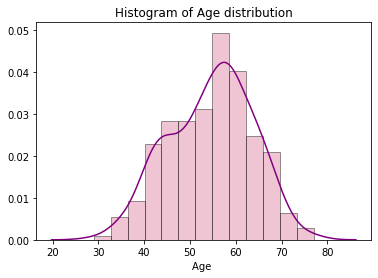

In [68]:
sns.distplot(HD['age'], color = 'purple' , hist_kws={'edgecolor':'black', "color":'palevioletred' });
plt.title('Histogram of Age distribution');
plt.xlabel('Age ');


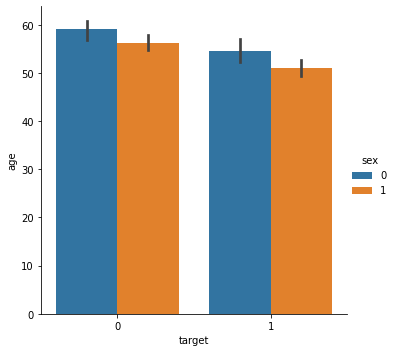

In [74]:
sns.catplot(x='target', y='age', hue='sex', data=HD, kind='bar');

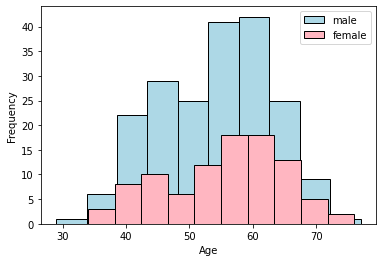

In [82]:
plt.hist(list(HD[HD['sex']==1]['age']), 
            ec = 'black', color='lightblue', label='male')
plt.hist(list(HD[HD['sex']==0]['age']), 
            ec = 'black' ,color="lightpink", label='female')
plt.legend()
plt.ylabel('Frequency'), plt.xlabel('Age');